# Exercise 1

For the evaluation of this unit, the student is asked to solve the following problem using the above Python Notebooks.

Create a script that generates random data from different distributions. Compare: (a) a normal or Gaussian distribution for different values of the variance and mean, (b) a uniformly random distribution, (c) the beta distribution.

In [6]:
#### Import necessary packages ####
import numpy as np
import matplotlib.pyplot as plt

## Definition of the distributions

##### Gaussian / normal distribution

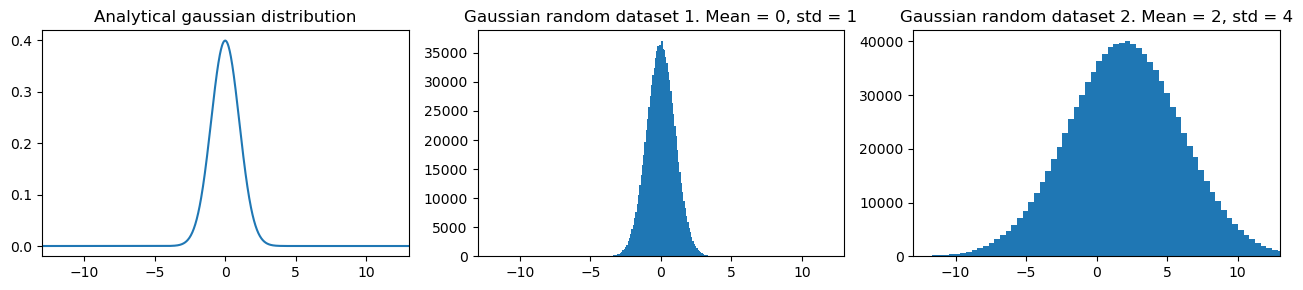

In [115]:
N_samples = int(1e6)
xlim = [-13,13]

# Analytical definition of the distribution
meanA = 0; stdA = 1

def gauss(x, mean, std):
    return (1/np.sqrt(2*np.pi*(std**2)))*np.exp(-(x-mean)**2/(2*std**2))

x = np.linspace(-13,13,1000); y = gauss(x, meanA, stdA)

# Random generation of samples following a gaussian distribution

mean1 = 0; std1 = 1
gauss_random1 = np.random.normal(loc=mean1, scale=std1, size=N_samples)

mean2 = 2; std2 = 4
gauss_random2 = np.random.normal(loc=mean2, scale=std2, size=N_samples)

# Plotting
fig1, axes_gauss = plt.subplots(nrows= 1, ncols= 3, figsize=(13, 3))
axes_gauss[0].plot(x,y); axes_gauss[1].hist(gauss_random1, 100); axes_gauss[2].hist(gauss_random2, 100);
axes_gauss[0].set_title('Analytical gaussian distribution'); 
axes_gauss[1].set_title(f"Gaussian random dataset 1. Mean = {mean1}, std = {std1}"); 
axes_gauss[2].set_title(f"Gaussian random dataset 2. Mean = {mean2}, std = {std2}")
for ax in axes_gauss:
    ax.set_xlim(xlim)
plt.tight_layout()


##### Uniformly random distribution

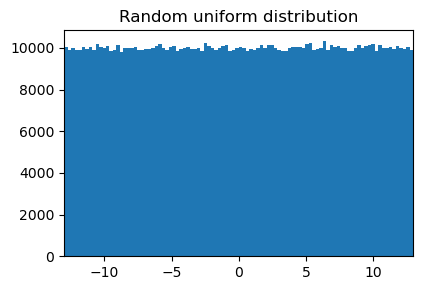

In [116]:
# Random generation of samples inside xlim interval
uniform_random = (xlim[1] - xlim[0]) * (-0.5 + np.random.rand(N_samples))

# Plotting
fig2, axes_un = plt.subplots(nrows= 1, ncols= 1, figsize=(13/3, 3))
axes_un.hist(uniform_random, 100);
axes_un.set_title('Random uniform distribution'); 
axes_un.set_xlim(xlim);
plt.tight_layout()

##### Beta random distribution

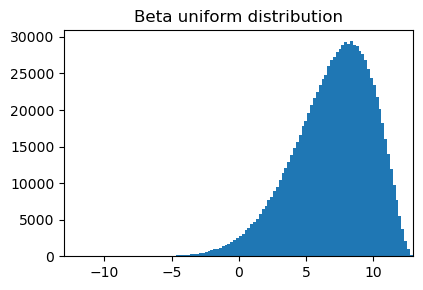

In [117]:
# Random generation of samples following beta distribution
alpha = 10; beta = 3
beta_random = (xlim[1] - xlim[0]) * (-0.5 +  np.random.beta(alpha, beta, N_samples))

# Plotting
fig3, axes_bet = plt.subplots(nrows= 1, ncols= 1, figsize=(13/3, 3))
axes_bet.hist(beta_random, 100);
axes_bet.set_title('Beta uniform distribution'); 
axes_bet.set_xlim(xlim)
plt.tight_layout()

## Problem 1
Estimate and compare the confidence intervals or error bars obtained for each distribution using Hoeffding's inequality and the Chebyshev inequality (for the latter one, you need to analyze or empirically estimate the variance).

#### Preliminary comments


For solving this problem, we will compare the confidence interval given by the Hoeffding's inequality:
$$
P(|\bar{X} - E[\bar{X}]| \ge \epsilon) \le 2e^{-\frac{2n^2\epsilon^2}{\sum_{i=1}^{n} (a_i-b_i)^2}} = 2e^{-\frac{2n\epsilon^2}{(a-b)^2}}
$$

And the Chebyshev inequality, for a random variable which is the mean of our data samples:
$$
P(|\bar{X} - E[\bar{X}]| \ge \epsilon) \le \frac{Var(\bar{X})}{\epsilon^2} = \frac{Var(X)}{n \epsilon^2}
$$
where $Var(X)$ is the empirical variance obtained from our data samples.

From these two inequalities, we can set the error probability (this is, the probability of being "outside" the $\epsilon$ range) to a specific value and compute the value of $\epsilon$ (the confidence interval) for that probability. To do this, we can solve for $\epsilon$ in both equations, and this will wive us an analytical expression for the error bar or confidence interval for a specific confidence probability.

For the Hoeffding's inequality, we get:
$$
\epsilon_H = (a-b)*\sqrt{\frac{log(\frac{P(|\bar{X} - E[\bar{X}]| \ge \epsilon)}{2})}{-2 n}}
$$

And for Chebyshev inequality we get a simpler expression which is:
$$
\epsilon_C = \sqrt{\frac{Var(X)}{n \cdot P(|\bar{X} - E[\bar{X}]| \ge \epsilon)}}
$$
\
We will now define these two functions in the code

In [118]:
def eps_H (P,a,b,n):
    return np.abs(a-b) * np.sqrt((np.log(P/2)) / (-2*n))

def eps_C (P, Var, n):
    return np.sqrt(Var / (n*P))

#### Resolution

Now we can proceeed to computing the confidence intervals given by Chebyshev inequality and Hoeffding's inequality for all the distributions that we have sampled earlier.

For each distribution, we will use $(a,b)$ as the maximum and minimum values obtained in our data samples. Also, we will compute the empirical variance for each of the datasets.

In [119]:
# First we define the probabilities that we will use for obtaining the confidence intervals
Probs = np.linspace(1,100,990)/100  # Probability for being outside epsilon
Probs_inside = 1 - Probs

### Gaussian distribution ##############################

# Parameters
ag1 = min(gauss_random1); bg1 = max(gauss_random1)
ag2 = min(gauss_random2); bg2 = max(gauss_random2)

varg1 = np.var(gauss_random1, ddof = 1)
varg2 = np.var(gauss_random2, ddof = 1)

# Epsilon Hoeffding
eps_H_gauss1 = eps_H(Probs, ag1, bg1, N_samples)
eps_H_gauss2 = eps_H(Probs, ag2, bg2, N_samples)

# Epsilon Chebyshev
eps_C_gauss1 = eps_C(Probs, varg1, N_samples)
eps_C_gauss2 = eps_C(Probs, varg2, N_samples)

### Uniform distribution ##############################

# Parameters
au = min(uniform_random); bu = max(uniform_random)
varu = np.var(uniform_random, ddof = 1)

# Epsilon Hoeffding
eps_H_uniform = eps_H(Probs, au, bu, N_samples)

# Epsilon Chebyshev
eps_C_uniform = eps_C(Probs, varu, N_samples)

### Beta distribution ##############################

# Parameters
ab = min(beta_random); bb = max(beta_random)
varb = np.var(beta_random, ddof = 1)

# Epsilon Hoeffding
eps_H_beta = eps_H(Probs, ab, bb, N_samples)

# Epsilon Chebyshev
eps_C_beta = eps_C(Probs, varb, N_samples)


We can now plot our results for the confidence intervals versus the probability $P(|\bar{X} - E[\bar{X}]| \ge \epsilon)$

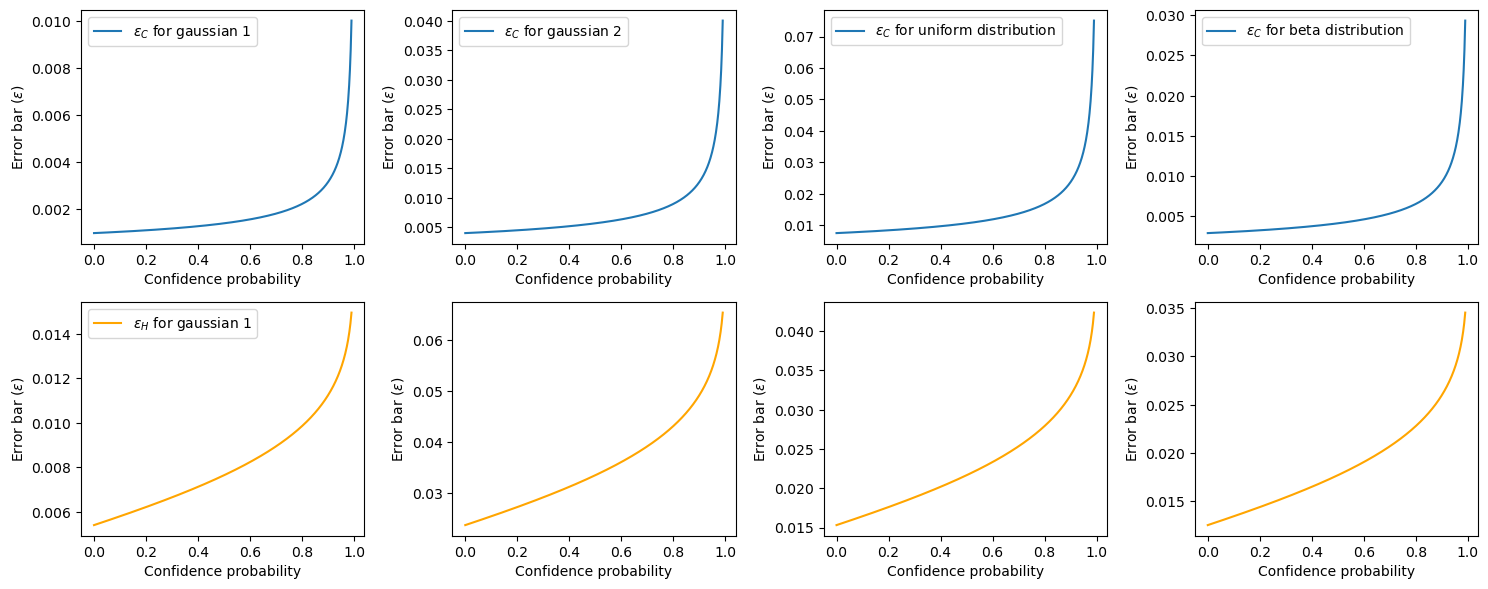

In [120]:
figeps, axeps = plt.subplots(nrows=2, ncols=4, figsize=(15, 6))

# Gaussian 1
axeps[0][0].plot(Probs_inside, eps_C_gauss1, label = r'$\epsilon_C$ for gaussian 1')
axeps[1][0].plot(Probs_inside, eps_H_gauss1, label = r'$\epsilon_H$ for gaussian 1', color = 'orange')
axeps[0][0].legend(); axeps[1][0].legend()

axeps[0][0].set_xlabel('Confidence probability'); axeps[0][0].set_ylabel(r'Error bar ($\epsilon$)')
axeps[1][0].set_xlabel('Confidence probability'); axeps[1][0].set_ylabel(r'Error bar ($\epsilon$)')

# Gaussian 2
axeps[0][1].plot(Probs_inside, eps_C_gauss2, label = r'$\epsilon_C$ for gaussian 2')
axeps[1][1].plot(Probs_inside, eps_H_gauss2, label = r'$\epsilon_H$ for gaussian 2', color = 'orange')
axeps[0][1].legend(); axeps[1][0].legend()

axeps[0][1].set_xlabel('Confidence probability'); axeps[0][1].set_ylabel(r'Error bar ($\epsilon$)')
axeps[1][1].set_xlabel('Confidence probability'); axeps[1][1].set_ylabel(r'Error bar ($\epsilon$)')

# Uniform distribution
axeps[0][2].plot(Probs_inside, eps_C_uniform, label = r'$\epsilon_C$ for uniform distribution')
axeps[1][2].plot(Probs_inside, eps_H_uniform, label = r'$\epsilon_H$ for uniform distribution', color = 'orange')
axeps[0][2].legend(); axeps[1][0].legend()

axeps[0][2].set_xlabel('Confidence probability'); axeps[0][2].set_ylabel(r'Error bar ($\epsilon$)')
axeps[1][2].set_xlabel('Confidence probability'); axeps[1][2].set_ylabel(r'Error bar ($\epsilon$)')

# Beta distribution
axeps[0][3].plot(Probs_inside, eps_C_beta, label = r'$\epsilon_C$ for beta distribution')
axeps[1][3].plot(Probs_inside, eps_H_beta, label = r'$\epsilon_H$ for beta distribution', color = 'orange')
axeps[0][3].legend(); axeps[1][0].legend()

axeps[0][3].set_xlabel('Confidence probability'); axeps[0][3].set_ylabel(r'Error bar ($\epsilon$)')
axeps[1][3].set_xlabel('Confidence probability'); axeps[1][3].set_ylabel(r'Error bar ($\epsilon$)')

plt.tight_layout()

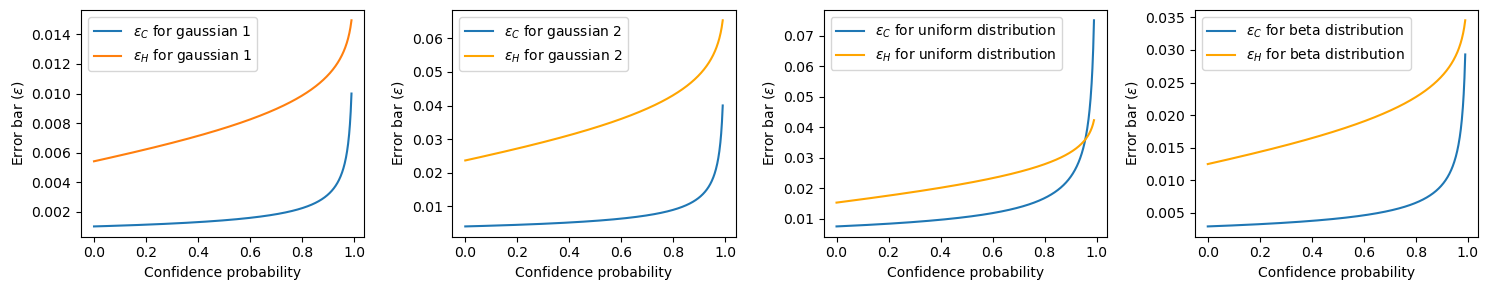

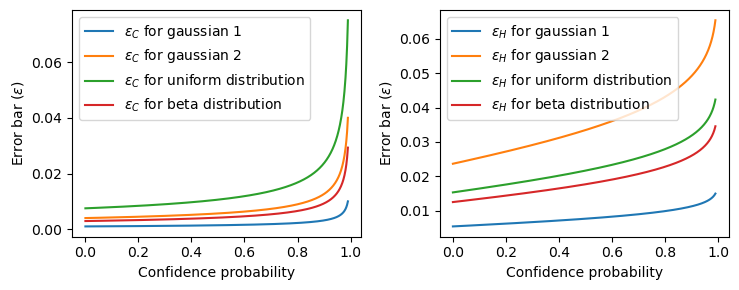

In [122]:
figeps, axeps = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))

# Gaussian 1
axeps[0].plot(Probs_inside, eps_C_gauss1, label = r'$\epsilon_C$ for gaussian 1')
axeps[0].plot(Probs_inside, eps_H_gauss1, label = r'$\epsilon_H$ for gaussian 1')
axeps[0].legend();

axeps[0].set_xlabel('Confidence probability'); axeps[0].set_ylabel(r'Error bar ($\epsilon$)')

# Gaussian 2
axeps[1].plot(Probs_inside, eps_C_gauss2, label = r'$\epsilon_C$ for gaussian 2')
axeps[1].plot(Probs_inside, eps_H_gauss2, label = r'$\epsilon_H$ for gaussian 2', color = 'orange')
axeps[1].legend();

axeps[1].set_xlabel('Confidence probability'); axeps[1].set_ylabel(r'Error bar ($\epsilon$)')

# Uniform distribution
axeps[2].plot(Probs_inside, eps_C_uniform, label = r'$\epsilon_C$ for uniform distribution')
axeps[2].plot(Probs_inside, eps_H_uniform, label = r'$\epsilon_H$ for uniform distribution', color = 'orange')
axeps[2].legend();

axeps[2].set_xlabel('Confidence probability'); axeps[2].set_ylabel(r'Error bar ($\epsilon$)')

# Beta distribution
axeps[3].plot(Probs_inside, eps_C_beta, label = r'$\epsilon_C$ for beta distribution')
axeps[3].plot(Probs_inside, eps_H_beta, label = r'$\epsilon_H$ for beta distribution', color = 'orange')
axeps[3].legend();

axeps[3].set_xlabel('Confidence probability'); axeps[3].set_ylabel(r'Error bar ($\epsilon$)')

figeps.tight_layout()

# Epsilon_C and Epsilon_H
figeps2, axeps2 = plt.subplots(nrows=1, ncols = 2, figsize = (7.5,3))

axeps2[0].plot(Probs_inside, eps_C_gauss1, label = r'$\epsilon_C$ for gaussian 1')
axeps2[0].plot(Probs_inside, eps_C_gauss2, label = r'$\epsilon_C$ for gaussian 2')
axeps2[0].plot(Probs_inside, eps_C_uniform, label = r'$\epsilon_C$ for uniform distribution')
axeps2[0].plot(Probs_inside, eps_C_beta, label = r'$\epsilon_C$ for beta distribution')

axeps2[0].set_xlabel('Confidence probability'); axeps2[0].set_ylabel(r'Error bar ($\epsilon$)')

axeps2[1].plot(Probs_inside, eps_H_gauss1, label = r'$\epsilon_H$ for gaussian 1')
axeps2[1].plot(Probs_inside, eps_H_gauss2, label = r'$\epsilon_H$ for gaussian 2')
axeps2[1].plot(Probs_inside, eps_H_uniform, label = r'$\epsilon_H$ for uniform distribution')
axeps2[1].plot(Probs_inside, eps_H_beta, label = r'$\epsilon_H$ for beta distribution')

axeps2[1].set_xlabel('Confidence probability'); axeps2[1].set_ylabel(r'Error bar ($\epsilon$)')


axeps2[0].legend(); axeps2[1].legend()

figeps2.tight_layout()

## Problem 2
When possible, compare your results to theoretical values.

## Problem 3
For which distributions does the 68–95–99.7 rule hold? Provide answers via Jupyter notebooks in GitHub or similar hosting server.